# Iris flowers classification with Machine Learning

This is the second content challenge of Codenation AceleraDev Data Science week 1.

It gives sequence to a long introduction about data science tools and workflow, which included contents about virtual environments for Python with `virtualenv` and `conda`, development with `PyCharm`, code packing and containerization with `make` and `docker`.

For this, we were invited to follow the [Your First Machine Learning Project in Python Step-By-Step](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/) post from Jason Browniee on his site Machine Learning Mastery.

Its purposes is to introduce us in the practice of machine learning with Python. It's a very basic machine learning tutorial. But particularly as I have a more consistent background in R than in Python, it was a very usefull resource.

Below i will basically follow Browniee's code step-by-step, to "keep things simple and focus on the machine learning not the toolchain", as suggested by him.

Before, i will describe my process to set the project environment.

## Project setting

It was open the terminal and type this list of commands:

Another package, `numpy`, was indicated to be installed either. But it had been installed as a dependency for `sklearn`, so I didn't need to install it directly.

After this my environment was ready to go, with these packages:

## Import libraries

In [23]:
# load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load data

In [24]:
# import libs
import pandas as pd

# Load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

## Summarize data

In [25]:
# Dimensions of dataset
dataset.shape

(150, 5)

In [26]:
# View data
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [27]:
# Statistical summary
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
# Class distribution
dataset.groupby('class').size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7faf00818fd0>>

In [29]:
# Other way to check class distribution
dataset['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

## Data visualization

### Univariate plots

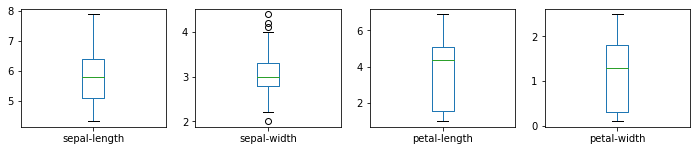

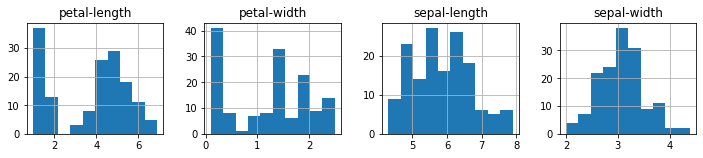

In [30]:
## boxplots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,10))
plt.show()

## histograms
dataset.hist(layout=(4,4), figsize=(12,10))
plt.show()

### Multivariate plots

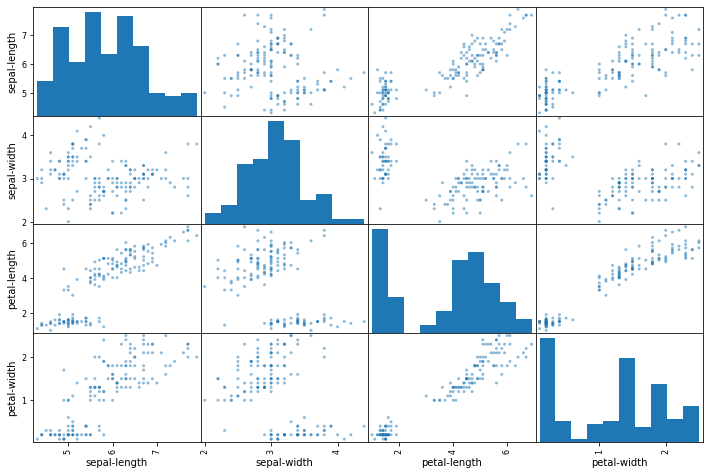

In [31]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(12,8))
plt.show()

## Split data to create validation data

In [32]:
# Split-out validation dataset
array = dataset.values
x = array[:,0:4]
y = array[:,4]
validation_size = 0.20
seed = 7
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)

## Build models

In [33]:
# Test options to evaluation metric
seed = 7
scoring = 'accuracy'

# Spot check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


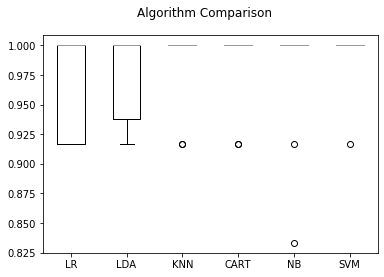

In [34]:
# Compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Make predictions

### For KNN

In [35]:
# Make predictions on validation data
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_validation)

In [36]:
print(accuracy_score(y_validation, predictions))

0.9


In [37]:
print(confusion_matrix(y_validation, predictions))

[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


In [38]:
print(classification_report(y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



## Predictions for all models

Brownie's example goes till here. He computed scores just for KNN model, what let me curious about the results reached by the other models. 
SVM showed greater accuracy when evaluted against train data. But this isn't a consistent way to evaluate the models. We need to compare how they performance against test data, which is unknowed by the algorithms.

So, which algorithm achieved a better prediction of iris flowers classification?

To check this we can reproduce the steps above in a loop to calculate accuracy for the different models. 

To make a readable output, first I will store the model names:

In [39]:
# Store model names
names = []

for name, model in models:
    names.append(name)
    
print(names)

['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']


And to compute accuracy for each model apart, the functions will be stored in a tuple.

In [48]:
# Store models
which_model = (LogisticRegression(solver='liblinear', multi_class='ovr'),
               LinearDiscriminantAnalysis(),
               KNeighborsClassifier(),
               DecisionTreeClassifier(),
               GaussianNB(),
               SVC(gamma='auto'))

Now it's possible to run the loop.

In [41]:
# Evaluate models
for i in range(0,6):
    which_model[i].fit(x_train, y_train)
    predictions = which_model[i].predict(x_validation)
    accuracy = accuracy_score(y_validation, predictions)
    msg = "%s: %f" % (names[i], accuracy)
    print(msg)

LR: 0.800000
LDA: 0.966667
KNN: 0.900000
CART: 0.900000
NB: 0.833333
SVM: 0.933333


As it can be seen, the result is different. With 96.7% of accuracy, Linear Discriminant Analysis (LDA) performed better than other algorithms on test data. Then it would be our better choice to generalize predictions.